In [1]:
%pip install scikit-learn

In [2]:
# Some data-handling functions to download/import.

# from https://github.com/yandexdataschool/mlhep2018/blob/master/day2-Tue/seminar-03-keras-cnn/seminar_tf_keras.ipynb
"""I load some cifar"""

import numpy as np
from sklearn.model_selection import train_test_split
import os, sys
if sys.version_info[0] == 2:
    from urllib import urlretrieve
    import cPickle as pickle

else:
    from urllib.request import urlretrieve
    import pickle

def unpickle(file):
    fo = open(file, 'rb')
    if sys.version_info[0] == 2:
        dict = pickle.load(fo)
    else:
        dict = pickle.load(fo,encoding='latin1')

    fo.close()
    return dict




def download_cifar10(path,
                     url='https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
                     tarname='cifar-10-python.tar.gz',):
    import tarfile
    if not os.path.exists(path):
        os.mkdir(path)



    urlretrieve(url, os.path.join(path,tarname))
    tfile = tarfile.open(os.path.join(path,tarname))
    tfile.extractall(path=path)


def load_cifar10(data_path=".",channels_last=False,test_size=0.2,random_state=1337):

    test_path = os.path.join(data_path,"cifar-10-batches-py/test_batch")
    train_paths = [os.path.join(data_path,"cifar-10-batches-py/data_batch_%i"%i) for i in range(1,6)]

    if not os.path.exists(test_path) or not all(list(map(os.path.exists, train_paths))):
        print ("Dataset not found. Downloading...")
        download_cifar10(data_path)

    train_batches = list(map(unpickle,train_paths))
    test_batch = unpickle(test_path)

    X = np.concatenate([batch["data"] for batch in train_batches]).reshape([-1,3,32,32]).astype('float32')/255
    y = np.concatenate([batch["labels"] for batch in train_batches]).astype('int32')
    X_train,X_val,y_train,y_val = train_test_split(X,y,
                                                   test_size=test_size,
                                                   random_state=random_state)

    X_test = test_batch["data"].reshape([-1,3,32,32]).astype('float32')/255
    y_test = np.array(test_batch["labels"]).astype('int32')

    if channels_last:
        #convert from [batch,3,H,W] to [batch,H,W,3]
        #WARNING! Make this is only necessary for tensorflow-style dim order
        #If you use theano-style dimensions in keras config, skip this cell
        X_train = X_train.transpose([0,2,3,1])
        X_val   = X_val.transpose([0,2,3,1])
        X_test  = X_test.transpose([0,2,3,1])


    return X_train,y_train,X_val,y_val,X_test,y_test

In [3]:
import tensorflow as tf
#gpu_options = tf.GPUOptions(allow_growth=True, per_process_gpu_memory_fraction=0.1) # restricts GPU load for multi-user nodes

import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

2.15.0
2.15.0


In [4]:
# Load the data samples

x_train,y_train,x_val,y_val,x_test,y_test = load_cifar10("cifar_data",channels_last=True)

NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",
                   "dog", "frog", "horse", "ship", "truck"]

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)
print("Val samples:", x_val.shape, y_val.shape)

Dataset not found. Downloading...
Train samples: (40000, 32, 32, 3) (40000,)
Test samples: (10000, 32, 32, 3) (10000,)
Val samples: (10000, 32, 32, 3) (10000,)


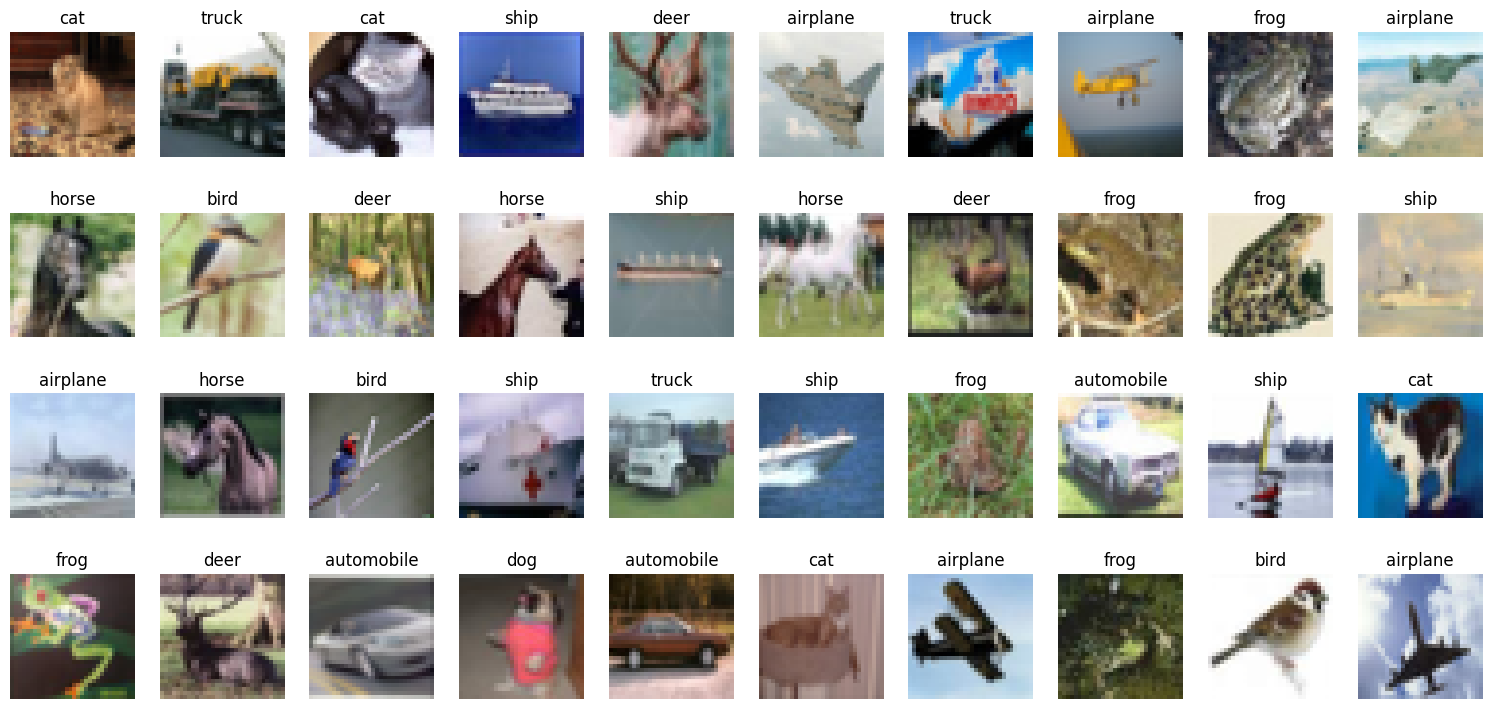

In [7]:
# show some random images from train, and their labels

cols = 10
rows = 4
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index]])
plt.show()

In [8]:
# normalize inputs
# convert class labels to one-hot encoded, should have shape (?, NUM_CLASSES)
# x_train = x_train.astype(np.float64) - 0.5

y_train = keras.utils.to_categorical(y_train, num_classes=10)

y_val = keras.utils.to_categorical(y_val, num_classes=10)

y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [9]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, GaussianNoise, BatchNormalization, Input
# from keras.layers.advanced_activations import LeakyReLU

In [14]:
def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """

    model = Sequential()

    ### STUDENT CODE HERE ###
    ### --> Build your convolutional neural network.
    ### First, make a CNN layer with some small kernels to learn some basic features, with Conv2D.
    ### Then, add a Pooling layer to pick up the relevant kernels.
    ### Then, Flatten it and add some fully-connected (Dense) normal NN layers,
    ###  to learn the relevant combinations of low-level kernel features.
    ### Finally, some regularisation is advised, using a Dropout layer, to avoid local minima.
    ### Make sure the output is of the same shape as the number of labels we have,
    ### And the input is the same as the figures (which now have a 3rd dimension - color!)
    ### Again, use google to find information on these classes.
    Input(shape=(32,32,3))
    model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
    model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(GaussianNoise(0.1))
    model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
    model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Flatten())
    model.add(Dense(units=64, activation="relu")) # number of units is arbitrary
    model.add(Dropout(rate=0.5)) # rate choice is probably arbitrary
    model.add(Dense(10))
    ### END STUDENT CODE ###

    # Ensure normalized probabilities over the 10 classes
    model.add(Activation("softmax"))

    return model

In [16]:
### STUDENT CODE HERE ###
### --> change the parameters below to perform a better training

INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 512
EPOCHS = 35


K.clear_session()  # clear default graph
# don't call K.set_learning_phase() !!! (otherwise will enable dropout in train/test simultaneously)
model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=keras.optimizers.Adamax(learning_rate=INIT_LR),  # for SGD.
    metrics=['accuracy']  # report accuracy during training
)

# fit model
model.fit(
    x_train, y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val),
    shuffle=True,
)

# save weights to file to avoid re-training
model.save_weights("test.weights.h5")

Epoch 1/35
79/79 [==============================] - 204s 3s/step - loss: 1.8472 - accuracy: 0.3282 - val_loss: 2.3576 - val_accuracy: 0.1773
Epoch 2/35
79/79 [==============================] - 199s 3s/step - loss: 1.4639 - accuracy: 0.4717 - val_loss: 2.7648 - val_accuracy: 0.1943
Epoch 3/35
79/79 [==============================] - 197s 3s/step - loss: 1.2730 - accuracy: 0.5489 - val_loss: 2.8756 - val_accuracy: 0.1720
Epoch 4/35
79/79 [==============================] - 196s 2s/step - loss: 1.1167 - accuracy: 0.6118 - val_loss: 3.1593 - val_accuracy: 0.1771
Epoch 5/35
79/79 [==============================] - 188s 2s/step - loss: 1.0162 - accuracy: 0.6491 - val_loss: 2.3185 - val_accuracy: 0.2982
Epoch 6/35
79/79 [==============================] - 198s 3s/step - loss: 0.9277 - accuracy: 0.6827 - val_loss: 1.8634 - val_accuracy: 0.4254
Epoch 7/35
79/79 [==============================] - 198s 3s/step - loss: 0.8558 - accuracy: 0.7095 - val_loss: 1.6503 - val_accuracy: 0.4765
Epoch 8/35
79

In [17]:
# load weights from file (can call without model.fit)
model.load_weights("test.weights.h5")

313/313 [==============================] - 15s 47ms/step


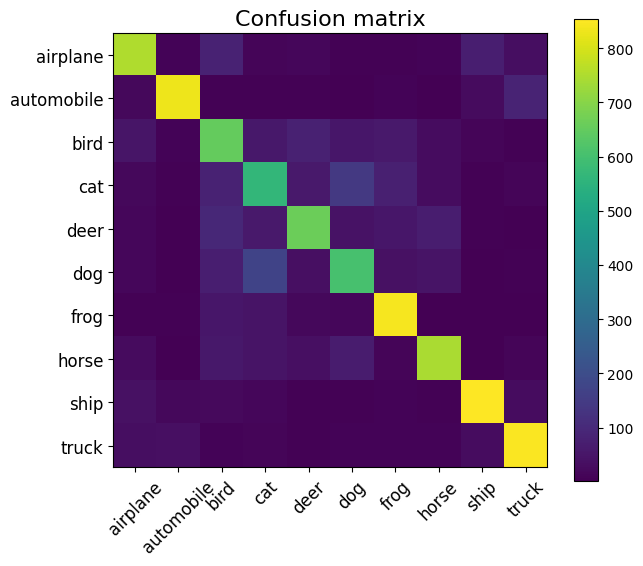

Test accuracy: 0.7354


In [18]:
# make test predictions
y_pred_test = model.predict(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)
y_test_index = [list(onehot).index(1) for onehot in y_test]

# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test_index, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test_index, y_pred_test_classes))

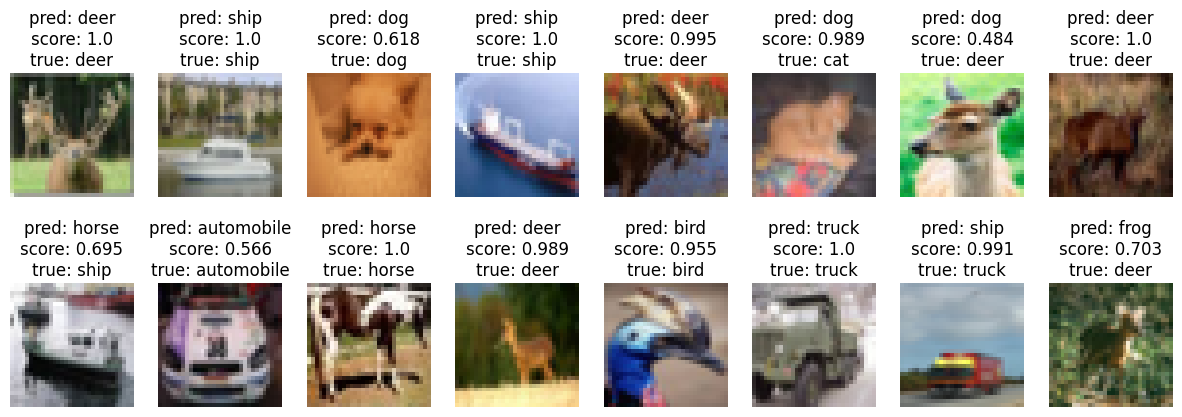

In [22]:
# inspect preditions
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test_index[random_index]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

Report:

The algorthm is rather easy to understand in my opinion, it consists of convolutional layers for feature extraction, batch normalization for normalization, max pooling for dimensionality reduction, Gaussian noise for regularization, and dense layers for classification. The order of these is in actuality not 100% important and im sure there are better ways to order it that is done in this code however the important thing is to sort the images into values then use a "soft max" type function to make it pick one of the options as an answer.

This algorthim managed to get a decent accuracy of around 95% although the time for training was rather long.

I did notice that it tends to guess horse a lot when the images are very confusing (like hard for a human confusing).